# E7: Lab Assignment 09

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## About this Lab
The objective of this assignment is to familiarize you with numerical series and root finding methods.

## Autograder
You will be provided with some test cases (i.e., sample input data) and associated answers (i.e., expected outputs) that you can use to help check your code. The provided test cases are not exhaustive, and it is your responsibility to ensure that your code works in general, not just for a few supplied test cases. We may use additional hidden test cases in grading your lab assignments.

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

## Answer cells
Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and these should be deleted and replaced with your answers.

Your answers must be in the cells marked `# ANSWER CELL`, including your final calculation/code. However, do not perform scratchwork in `# ANSWER CELL`. Add a new cell to perform your scratchwork. Your scratchwork will not be graded and does not need to be included in your submission unless otherwise noted.

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question| Points
--- | --
1 | 8.0
2 | 3.0
3 | 6.0
4 | 4.0
5 | 4.0
Total | 25.0

**Run the cell below**, to import the required modules.

In [183]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import scipy
from scipy.optimize import fsolve
np.seterr(all='ignore');

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

## Question 1: Writing your own trigonometric function

There is no direct way to calculate generic trigonometric functions, even on a computer. In order to find the solution to a given trigonometric function, computers instead use a high accuracy estimate. In this problem, you will implement your own trigonometric function using a Taylor series expansion. Computers actually use the CORDIC algorithm to implement trigonometric functions, logarithms and other floating-point arithemtic operations. You can find more about it [here](https://en.wikipedia.org/wiki/CORDIC) but it is not required for this assignment. 

### Question 1.0: Taylor series for sine

The Taylor series expansion about zero for sine (with input in radians) is

$$\sin(x) \approx x - x^3/3! + x^5/5! - x^7/7! + \dots + (-1)^{(n-1)}\frac{x^{(2n-1)}}{(2n-1)!}$$

or in summation notation

$$\sin(x) \approx \sum_{n=1}^N (-1)^{(n-1)}\frac{x^{(2n-1)}}{(2n-1)!}$$

For this problem, we will consider the $N^{th}$ Taylor expansion of sine to be the sum of the first $N$ terms of this series. The approximation above becomes exact as $N$ approaches infinity.

Write a function `mySin(X,N)` which computes sine at every radian value in `X` which may be a scalar float or a `np.ndarray` of floats using the $N^{th}$ Taylor expansion for sine. The input `N` is a scalar integer greater than 0. The output should be of the same type and size as `X`.

Once you are done, try out your new `mySin(X,N)` function for the examples below and make sure it produces the correct output. Assign the result to `q1_0`.


```PYTHON
Examples: 

>>> mySin(np.pi/2, 1)
1.5707963267948966

>>> mySin(np.pi/2, 5)
1.000003542584286

>>> mySin(np.linspace(0,np.pi,3), 7)
array([0.00000000e+00, 1.00000000e+00, 2.11425676e-05])

>>> mySin(np.linspace(0,5*np.pi,6),10)
array([ 0.00000000e+00, -5.28919613e-10, -1.04818280e-03, -4.78057566e+00,
       -1.78979741e+03, -1.69520866e+05])

>>> mySin(np.array([[np.pi/6, np.pi/4],[np.pi/3, np.pi/2]]), 10)
array([[0.5       , 0.70710678],
       [0.8660254 , 1.        ]])
```

In [184]:
# ANSWER CELL
# BEGIN SOLUTION
def mySin(X, N):
    """
    Computes the Nth Taylor expansion of sine for inputs in X
    X: numpy array (float), radians
    N: Nth degree of a sine Taylor Series expansion
    Output: Double same size as X
    """
    sinSeries = np.zeros_like(X)
    for i in range(1, N+1):
        sinSeries = sinSeries + ((-1)**(i-1) * (np.power(X,(2*i-1)))) / math.factorial(2*i-1)
        
    return sinSeries

## Alternative solution
#  mySin = lambda X,N: sum([((-1)**(i-1)*(np.power(X,(2*i-1))))/math.factorial(2*i-1) for i in range(1, N+1)])

# END SOLUTION

In [185]:
# TEST YOUR FUNCTION HERE
q1_0 = mySin(np.array([[np.pi/6, np.pi/4],[np.pi/3, np.pi/2]]), 10)  # SOLUTION
q1_0

array([[0.5       , 0.70710678],
       [0.8660254 , 1.        ]])

In [186]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q1_0)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [187]:
# Check scalar inputs
assert get_hash(np.round(mySin(np.pi/2, 1),12)) == '1a719dcf1663212100d2e67bde1bf011'
assert get_hash(np.round(mySin(np.pi/2, 5),12)) == 'c33503c8532ac302a28dec7a8695083d'
assert get_hash(np.round(mySin(10, 1),12)) == '43a1437f7f656cd8be7c996c58719e0a'
assert get_hash(np.round(mySin(10, 5),12)) == '6b7a412ebdb1a3044003351946322472'

In [188]:
# Check array inputs
assert get_hash(np.round(mySin(np.linspace(0,np.pi,3), 7),12)) == '70dcebc7523a6b7b23eb3f39d6da2d7b'
assert get_hash(np.round(mySin(np.linspace(0,10), 3),12)) == 'dde806fe948e1110336086aea5ed0325'
assert get_hash(np.round(mySin(np.array([[np.pi/6, np.pi/4],[np.pi/3, np.pi/2]]), 10),12)) == '70b814a20f1d02555f97445fc0ac07ca'
assert get_hash(np.round(mySin(np.array([[1, 2],[3, 4]]), 5),12)) == 'd78aab5ce5a5d950b5426707fd4371c0'

### Question 1.1: Convergence of Taylor series

For a finite number of terms, the error of the Taylor series estimate for sine (expanded about the origin) increases away from the origin. This error is often approximated based on the next term of the Taylor series, since that term is the largest that is being neglected. For example, the 2nd Taylor approximation for sine would have an error on the order of $x^5/5!$ which is ususally expressed in Big-O notation as $\mathcal{O}(x^5)$). For this problem, you will write a function that finds the error between your approximation for sine and the `numpy.sin` function. You will also compute the value of the next term in the Taylor series expansion for sine, so that we can compare the two and see if they actually produce similar results.

Define a function named `CompareTaylorConvergence(X,N)` which computes the error in the $N^{th}$ Taylor approximation for sine, along with the absolute value of the $(N+1)^{th}$ term of the Taylor expansion for all values in `X`. Your function should return the error and next term (in this order), both of which should be of the same type and size as `X`

Once you are done, test your function for the examples below. Assign the result to `q1_1`. Feel free to experiment with other inputs.

```PYTHON
Examples:
    
    >>> CompareTaylorConvergence(2*np.pi, 5)
    (0.0010481827960599414, 0.0011309237482517954)
    
    >>> CompareTaylorConvergence(np.linspace(-np.pi, np.pi ,4), 2)
    (array([2.02612013, 0.01022462, 0.01022462, 2.02612013]),
     array([2.55016404, 0.0104945 , 0.0104945 , 2.55016404]))
```

In [189]:
# ANSWER CELL

# BEGIN SOLUTION
def CompareTaylorConvergence(X,N):
    """
    Finds the error in the Nth Taylor approximation for sine, along with
    absolute value of the (N+1)th term of the Taylor expansion

    """
    error = np.abs(mySin(X, N)- np.sin(X))
    next_term = np.abs((-1)**N*(X**(2*N+1))/math.factorial(2*N+1))
    
    return error, next_term
# END SOLUTION

In [190]:
# TEST YOUR FUNCTION HERE
N = 2 # SOLUTION
X = np.linspace(-np.pi, np.pi, 4) # SOLUTION
q1_1 = CompareTaylorConvergence(X,N) # SOLUTION
q1_1

(array([2.02612013, 0.01022462, 0.01022462, 2.02612013]),
 array([2.55016404, 0.0104945 , 0.0104945 , 2.55016404]))

In [191]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q1_1)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [192]:
# Check scalar inputs
error, next_term = CompareTaylorConvergence(2*np.pi,10)
assert get_hash(np.round(np.sum(error),8)) == '1342c198f5fa4fbda5916561745c34a9', 'Check error.'
assert get_hash(np.round(np.sum(next_term),8)) == '01ca83610c11fd5338f7e818ba84f1ca', 'Check next term.'
error, next_term = CompareTaylorConvergence(2*np.pi,5)
assert get_hash(np.round(np.sum(error),8)) == '4b9473aa3637ebc2d2f2f81f61faa399', 'Check error.'
assert get_hash(np.round(np.sum(next_term),8)) == 'b6bf808b29bf005e1758841a65038ed8', 'Check next term.'

In [193]:
# Check array inputs
error, next_term = CompareTaylorConvergence(np.linspace(-np.pi, np.pi, 4),10)
assert get_hash(np.round(np.sum(error),8)) == '30565a8911a6bb487e3745c0ea3c8224', 'Check error.'
assert get_hash(np.round(np.sum(next_term),8)) == '30565a8911a6bb487e3745c0ea3c8224', 'Check next term.'
error, next_term = CompareTaylorConvergence(np.linspace(-np.pi, np.pi, 4),5)
assert get_hash(np.round(np.sum(error),8)) == '3a27dec9b3b10fbcef90e55e1f2d4216', 'Check error.'
assert get_hash(np.round(np.sum(next_term),8)) == 'a0baefa6c0d8c8ca7de6dca65419858e', 'Check next term.'

### Question 1.2: Convergence of Taylor series

Let us now plot the error and the next term in the Taylor series so that we can compare them visually.

Define a function named `PlotTaylorConvergence(X,N)` which returns a `matplotlib.pyplot` figure of the error in the $N^{th}$ Taylor approximation for sine and the absolute value of the $(N+1)^{th}$ term of the Taylor expansion for all values in `X` as computed in the previous part.

The function should create the figure as follows:
* Plot (1) `X` vs. the absolute value of the error of your  `mySin` function compared to `numpy.sin`, computed on `X`
* Plot (2) `X` vs. the absolute value of the next term in the Taylor expansion computed on `X` 
* A legend with labels 'Error' and 'Next term' for curves 1 and 2, respectively
* X axis label which reads 'X'
* Y axis label which reads 'Absolute value'
* Title label which reads 'N = {N} Taylor expansion of sine', where {N} is replaced with `N`

Once you are done, test your function for `N = 2` and `X = np.linspace(-N*np.pi/2., N*np.pi/2.)`. Assign the result to `q1_2`. Your output figure should look like Figure 1 shown below. Feel free to experiment with other inputs as well as any plotting options that are not explicitly specified.

<img src="resources/taylor.png" style="width: 500px;"/>
<figcaption style="text-align:center"> Figure 1. Error and next term of N = 2 sine Taylor expansion. </figcaption>   

In [194]:
# ANSWER CELL

# Do not modify this line
import matplotlib.pyplot as plt

# BEGIN SOLUTION

def PlotTaylorConvergence(X,N):
    """
    Plots the error in the Nth Taylor approximation for sine, along with
    absolute value of the (N+1)th term of the Taylor expansion

    """
    [error, next_term] = CompareTaylorConvergence(X, N) 
    
    # Create figure
    fig = plt.figure(figsize=(6,4))
    plt.plot(X,error,label='Error') 
    plt.plot(X,next_term,label='Next term') 
    plt.xlim([np.min(X),np.max(X)]) 
    plt.xlabel('X') 
    plt.ylabel('Absolute value') 
    plt.title(f'N = {N} Taylor expansion of sine')
    plt.grid() 
    plt.legend() 
    return fig

# END SOLUTION

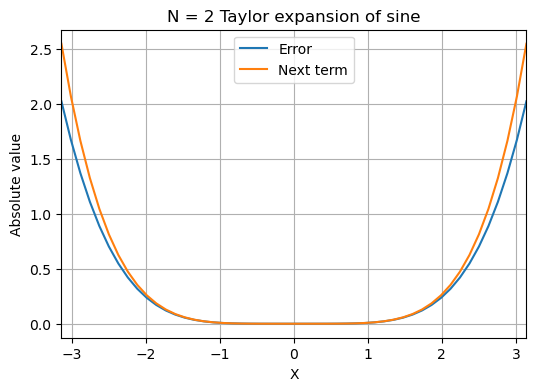

In [195]:
# TEST YOUR FUNCTION HERE
N = 2 # SOLUTION
X = np.linspace(-N*np.pi/2., N*np.pi/2.) # SOLUTION
q1_2 = PlotTaylorConvergence(X, N) # SOLUTION

In [196]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q1_2)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [197]:
import matplotlib.pyplot as plt
N = 5
X = np.linspace(-N*np.pi/2., N*np.pi/2.)
fig = PlotTaylorConvergence(X, N)
plt.close()
error,next_term = CompareTaylorConvergence(X, N);
assert np.allclose(fig.axes[0].get_lines()[0].get_xdata(),X)
assert np.allclose(fig.axes[0].get_lines()[0].get_ydata(),error)
assert np.allclose(fig.axes[0].get_lines()[1].get_ydata(),next_term)
# Check line labels
assert fig.axes[0].get_lines()[0].get_label() == 'Error', 'Check the line labels.'
assert fig.axes[0].get_lines()[1].get_label() == 'Next term', 'Check the line labels.'
# Check xlabel and fontsize
assert 'X' in fig.axes[0].get_xlabel().upper(), 'Check the x-axis label.'
# Check ylabel and fontsize
assert 'ABSOLUTE' in fig.axes[0].get_ylabel().upper(), 'Check the y-axis label.'
assert 'VALUE' in fig.axes[0].get_ylabel().upper(), 'Check the y-axis label.'
# Check title and fontsize
assert  str(N) in fig.axes[0].get_title().upper(), 'Check the title label.'
assert 'TAYLOR' in fig.axes[0].get_title().upper(), 'Check the title label.'
assert 'EXPANSION' in fig.axes[0].get_title().upper(), 'Check the title label.'
# Check legend is added
assert type(fig.axes[0].get_legend()) != type(None), 'Make sure to add a legend.'
# Check xlim and ylim
assert fig.axes[0].get_xlim() == (np.min(X), np.max(X)), 'Check the x-axis limits.'

### Question 1.3: Using the periodicity of sine

The last problem demonstrates that, far enough from the origin, a finite Taylor expansion always diverges from the actual solution for sine. One way to improve the accuracy for such inputs is to utilize the periodicity of the sine function. i.e.

$$\sin(x \pm 2\pi) = \sin(x)$$

Write a function `mySinPeriodic(X,N)` which converts every radian value in `X` to the range $[-\pi, \pi)$ using the periodicity of sine and then calculates sine at each point using the Nth Taylor expansion for sine. The output should be the same type and size as the input `X`.

`X` which may be a scalar float or a `np.ndarray` of floats using the $N^{th}$ Taylor expansion for sine. The input `N` is a scalar integer greater than 0. The output should be of the same type and size as `X`.

Once you are done, try out your new `mySinPeriodic(X,N)` function for the examples below in the following cell. Assign the output to `q1_3`. Feel free to try it for other inputs.

*Hint*: Be careful if you wish to use the Python function mod `%`. Applying `% (2*np.pi)` will map the values to the range $[0, 2\pi)$. You'll then have to shift values in the range $[\pi, 2\pi)$ to the range $[-\pi, 0)$. 
For example:
* $\sin(2.5\pi) = \sin(2.5\pi\,\%\,2\pi) = \sin(0.5\pi)$ 

* $\sin(-2.5\pi) = \sin(-2.5\pi\,\%\,2\pi) = \sin(1.5\pi) = \sin(1.5\pi -2\pi) = \sin(-0.5\pi)$

Scalars and arrays may also need separate treatment depending on your implementation.

```PYTHON
    Examples:

    >>> mySin(1, 10) # original
    0.8414709848078965
    
    >>> mySinPeriodic(1, 10)  # periodic
    0.8414709848078965
    
    >>> mySin(1+20*np.pi, 10)  # original
    -1.4964419187562707e+17
    
    >>> mySinPeriodic(1+20*np.pi, 10) # periodic
    0.8414709848078965
    
    >>> mySin(np.linspace(0,5*np.pi,6),10) # original
    array([0.00000000e+00, -5.28919613e-10, -1.04818280e-03, -4.78057566e+00, -1.78979741e+03, -1.69520866e+05])
    
    >>> mySinPeriodic(np.linspace(0,5*np.pi,6),10) # periodic
    array([0.0000000e+00, 5.2891828e-10, 0.0000000e+00, 5.2891828e-10, 0.0000000e+00, 5.2891828e-10])
```

In [198]:
mySin(np.linspace(0,5*np.pi,6),10)

array([ 0.00000000e+00, -5.28919613e-10, -1.04818280e-03, -4.78057566e+00,
       -1.78979741e+03, -1.69520866e+05])

In [199]:
# ANSWER CELL
# BEGIN SOLUTION
def mySinPeriodic(X, N):
    """
    Converts every radian value in X to the range [-pi,pi] using
    the periodicity of sine and then calculates sine at each point using the
    Nth Taylor expansion for sine
    """
    X = X % (2*np.pi) 
    if isinstance(X, np.ndarray):
        X[X>=np.pi] = X[X>=np.pi] - 2*np.pi
    else:
        if X >= np.pi:
            X = X - 2*np.pi
            
    return mySin(X, N)
# END SOLUTION

In [200]:
(-2.5*np.pi)%(2*np.pi)

4.71238898038469

In [201]:
# TEST YOUR FUNCTION HERE
q1_3 = mySinPeriodic(1, 10)  # SOLUTION
q1_3

0.8414709848078965

In [202]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q1_3)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [203]:
# Check scalar inputs
assert get_hash(np.round(mySinPeriodic(1, 10),14)) == '099c6f8b0fd2375bd1f67fd0361b42d6'
assert get_hash(np.round(mySinPeriodic(1+20*np.pi, 10),14)) == '099c6f8b0fd2375bd1f67fd0361b42d6'
assert get_hash(np.round(mySinPeriodic(-1, 10),14)) == 'c1e44cffdfabeb1714daa8cbaec4abe8'
assert get_hash(np.round(mySinPeriodic(-1-20*np.pi, 10),14)) == 'c1e44cffdfabeb1714daa8cbaec4abe8'

assert get_hash(np.round(mySinPeriodic(2, 10),14)) == '3dcc92152b4197b5132931b66178541c'
assert get_hash(np.round(mySinPeriodic(2+20*np.pi, 10),14)) == '3dcc92152b4197b5132931b66178541c'
assert get_hash(np.round(mySinPeriodic(-2, 10),14)) == '6e5f88db7a4ea0b587bd9620e1056087'
assert get_hash(np.round(mySinPeriodic(-2-20*np.pi, 10),14)) == '6e5f88db7a4ea0b587bd9620e1056087'

In [204]:
# Check array inputs
assert get_hash(np.round(np.sum(mySinPeriodic(np.linspace(0,5*np.pi,6), 10)),8)) == '30565a8911a6bb487e3745c0ea3c8224'
assert get_hash(np.round(np.sum(mySinPeriodic(np.linspace(0,5*np.pi,20), 5)),8)) == '862314151b0333d3b2dfaaa23aca221a'
assert get_hash(np.round(np.sum(mySinPeriodic(np.linspace(-10*np.pi,5*np.pi,20), 5)),8)) == 'b209fa8add1e3a19872f5411ef9b3d2f'
assert get_hash(np.round(np.sum(mySinPeriodic(np.linspace(-10*np.pi,5*np.pi,15), 10)),8)) == '0df16f7567b8e2fbbaf8f129ef2e9480'

### Question 1.4: Accurate range of the Taylor series
Now, we will examine how well our new and improved approximation for sine works by finding the range of values for which its accuracy is acceptable. Earlier we saw that the error in our Taylor series approximation is mostly contained in the leading term, i.e. the next term in the expansion after our cut-off. We can then determine the range of accuracy by checking where this next term exceeds some threshold value. We could also estimate it by monitoring the error relative to `numpy.sin`. However, note that `numpy.sin` is itself an approximation and also that in general we don't have access to such reference values.

Write a function `TaylorAccRange(N, tol)` that finds the range of angles for which the (absolute) value of the next term in the $N^{th}$ Taylor expansion is less than the given tolerance, `tol`. The range should be returned as a 2-element list containing the minimum and maximum angle in radians for which every angle in between can be found to within the given tolerance. You should consider the periodicity of sine in the function, such that angles outside of the range $[-\pi, \pi)$ are taken as their corresponding angle within that range. If your Taylor approximation is within the tolerance for all angles, your function should return the list $\{-\infty, \infty\}$ (recall the built-in `numpy.inf`).

Once you are done, try out your new `TaylorAccRange(N, tol)` function for the examples below in the following cell. Assign the output to `q1_4`. Feel free to try it for other inputs.

*Hint*: You may wish to rewrite this problem as a root solving problem; you are free to use the built-in `scipy.optimize.fsolve` function.  Refer to the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).


```PYTHON
    Examples:

    >>> TaylorAccRange(5, 0.1)
    [-inf, inf]
    
    >>> TaylorAccRange(5, 0.001)
    [-2.6199130820816245, 2.6199130820816245]
    
    >>> TaylorAccRange(5, 1e-8) 
    [-0.9199017158167089, 0.9199017158167089]
```

In [205]:
# ANSWER CELL
# BEGIN SOLUTION
def TaylorAccRange(N, tol):
    """
    Finds the range of angles for which the error in the Nth taylor expansion is 
    less than the given tolerance, tol.
    Outputs 2-element list containing minimum and maximum angle in radians for which 
    every angle in between can be found within the given tolerance
    """
    f = lambda x: tol - np.abs(np.power(-1,N)*np.power(x,(2*N+1))/math.factorial(2*N+1))
    angle = scipy.optimize.fsolve(f, x0 = np.pi)
    ang_range = [-abs(angle[0]), abs(angle[0])]
    
    if abs(angle[0]) >= math.pi:
        ang_range = [-np.inf, np.inf]
        
    return ang_range
# END SOLUTION

In [206]:
# TEST YOUR FUNCTION HERE
q1_4 = TaylorAccRange(5, 1e-8)  # SOLUTION
q1_4

[-0.9199017158167089, 0.9199017158167089]

In [207]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q1_4)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [208]:
assert get_hash(len(TaylorAccRange(5, 1e-8))) == 'c81e728d9d4c2f636f067f89cc14862c'
assert get_hash(np.round(TaylorAccRange(5, 0.1)[0],8)) == '9c41dab8e025b5db402b00cface5d381'
assert get_hash(np.round(TaylorAccRange(5, 0.1)[1],8)) == 'ee7b630995e7a36b6420696989441e2d'
assert get_hash(np.round(TaylorAccRange(5, 0.001)[0],8)) == 'c917a9e190d0c94c49ff24bab517b799'
assert get_hash(np.round(TaylorAccRange(5, 0.001)[1],8)) == '1089492f2ada616b051abde7ed35ebf2'
assert get_hash(np.round(TaylorAccRange(5, 1e-8)[0],8)) == '0262452e00cc917efe9134ae8192100c'
assert get_hash(np.round(TaylorAccRange(5, 1e-8)[1],8)) == '26cddfda7149a4fce6fa2a47f4c2af32'

## Quesion 2: $n^{th}$ root

An $n^{th}$ root $r$ of a number $x$ satisfies the equation $$r = \sqrt[n]{x},$$ which can also be stated as $$r^n = x$$

We'll only consider real roots for this problem. Create a function named `my_nth_root(x,n,r0,tol)` which outputs an approximation of $r$, an $n^{th}$ root of x. This approximation should be computed by using the Newton-Raphson method to find the root of the function $f(r)=r^n−x$. The function inputs should be 
* `x`, a strictly positive float for which you want an approximate $n^{th}$ root
* `n`, an integer specifying the root degree 
* `r0`, the initial guess for the Newton-Raphson method
* `tol`, a strictly positive scalar specifying the tolerance for the Newton-Raphson method

Your function should return once the error metric $|f(r)|$ is strictly less than the tolerance `tol` **or** the Newton-Raphson method has exceeded 50 iterations.

Once you are done, try out your new `my_nth_root(x,n,r0,tol)` function for the examples below in the following cell. Assign the output to `q2`. Feel free to try it for other inputs.


```PYTHON
Examples:

>>> my_nth_root(27,3,2,1e-16)
3.0

>>> my_nth_root(27,3,2,1e-3)
3.0000022249817473

>>> my_nth_root(256,4,3,1e-12)
4.0

>>> my_nth_root(256,4,-3,1e-12)
-4.0

# initial guess is too far away from solution and function exceeds iteration limit
>>> my_nth_root(256,4,1e10,1e-16)
5663.216564269596
```


In [209]:
# ANSWER CELL
# BEGIN SOLUTION
def my_nth_root(x,n,r0,tol):
    """
    Computes the n-th root of x using the Newton-Raphson
     method with initial guess r0 and tolerance tol

    """
    f = lambda y: y**n - x
    df = lambda y: n*y**(n-1)
    r = r0
    iteration = 0
    while abs(f(r)) >= tol and iteration < 50:
        r = r - f(r)/df(r)
        iteration += 1    
    return r    
        
# END SOLUTION

In [210]:
# TEST YOUR FUNCTION HERE
q2 = my_nth_root(27,3,2,1e-3)  # SOLUTION
q2

3.0000022249817473

In [211]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q2)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [212]:
# Check given examples
assert get_hash(np.round(my_nth_root(27,3,2,1e-16),10)) == '55c82b601deae028c1c5e87fd820923d'
assert get_hash(np.round(my_nth_root(27,3,2,1e-3),10)) == '371af88c7860edd26b2a4b7dc2fa6878'
assert get_hash(np.round(my_nth_root(256,4,3,1e-12),10)) == '07078a97d66756f213dbca3e379bf084'
assert get_hash(np.round(my_nth_root(256,4,-3,1e-12),10)) == '875e88e1e07100951fd600d433642d16'
assert get_hash(np.round(my_nth_root(256,4,1e10,1e-16))) == '2fcafc04acd5bc8ee91a014813afcde8'

In [213]:
# Check new examples
assert get_hash(np.round(my_nth_root(100,5,3,1e-2),10)) == '5faed5da378bd58e7ad9be229e823377'
assert get_hash(np.round(my_nth_root(100,5,3,1e-8),10)) == 'b5f3a7bb40caeee1ae1bb6e8f3a5d142'
assert get_hash(np.round(my_nth_root(20,7,3,1e-4),10))  == 'f526e5765889341889d0d7c672b8e14d'
assert get_hash(np.round(my_nth_root(20,7,3,1e-8),10))  == '64561798514bfcde899c54914a90098c'

## Question 3: Root finding

Let us now generalize the implementation of the Newton-Raphson method to any function as well as compare its performance to the bisection method.

### Question 3.0: Newton's Method

Define a function `myNewton(f, df, x0, maxiter, tol)` where
* `f` is a function representing the function $f(x)$,
* `df` is a function representing the derivative of $f$,
* `x0` is an initial estimate of the root,
* `maxiter` is the maximum number of iterations allowed, a positive integer 
* `tol` is the tolerance, a strictly positive scalar float.

The function should return a list `R` containing the root approximations, i.e. `R[0]` is the initial estimate `x0`, and `R[k]` is the estimate of the root of `f` after $k$ iterations of the Newton-Raphson method.

The function should also return the absolute error in a list `E` where, similarly, `E[k]` is the value of $\lvert f(R(k)) \rvert$ at iteration $k$. 

The function should terminate when $\lvert f(R(k)) \rvert$ < `tol` or after `maxiter` iterations have been performed. If $N$ iterations of Newton's method have been performed, the two output lists should each have $N +1$ elements. You may assume that the derivative of `f` will not be 0 during any iteration for any of the test cases given. 

Once you are done, try out your new `myNewton(f, df, x0, maxiter, tol)` function for the examples below in the following cell. Assign the output to `q3_0`. Feel free to try it for other inputs.

```PYTHON
Examples:

>>> f = lambda x: x**2 - 2
>>> df = lambda x: 2*x
>>> myNewton(f, df, 1, 100, 1e-5)
([1, 1.5, 1.4166666666666667, 1.4142156862745099], [1, 0.25, 0.006944444444444642, 6.007304882871267e-06])

>>> f = lambda x: math.sin(x) - math.cos(x)
>>> df = lambda x: math.cos(x) + math.sin(x)
>>> myNewton(f, df, 1, 100, 1e-5)
([1, 0.782041901539138, 0.7853981759997019], [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08])

>>> f = lambda x: math.sinh(x) - 1
>>> df = lambda x: math.cosh(x)
>>> myNewton(f, df, -1, 100, 1e-8)
([-1, 0.4096484296196503, 0.9430603553462776, 0.8827364259018153, 0.8813742438952269, 0.8813735870196955], [2.1752011936438014, 0.578797742601695, 0.08919683435847481, 0.001928274492311477, 9.28962716750803e-07, 2.156053113822054e-13])
```

In [214]:
# ANSWER CELL
# BEGIN SOLUTION
def myNewton(f, df, x0, maxiter, tol):
    """
    >>> f = lambda x: x**2 - 2
    >>> df = lambda x: 2*x
    >>> myNewton(f, df, 1, 100, 1e-5)
    ([1, 1.5, 1.4166666666666667, 1.4142156862745099], [1, 0.25, 0.006944444444444642, 6.007304882871267e-06])

    >>> f = lambda x: math.sin(x) - math.cos(x)
    >>> df = lambda x: math.cos(x) + math.sin(x)
    >>> myNewton(f, df, 1, 100, 1e-5)
    ([1, 0.782041901539138, 0.7853981759997019], [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08])

    >>> f = lambda x: math.sinh(x) - 1
    >>> df = lambda x: math.cosh(x)
    >>> myNewton(f, df, -1, 100, 1e-8)
    ([-1, 0.4096484296196503, 0.9430603553462776, 0.8827364259018153, 0.8813742438952269, 0.8813735870196955], [2.1752011936438014, 0.578797742601695, 0.08919683435847481, 0.001928274492311477, 9.28962716750803e-07, 2.156053113822054e-13])

    """
    R = [x0]
    E = [abs(f(x0))]
    for _ in range(maxiter):
        if E[-1] < tol:
            break
        x0 = x0 - f(x0)/df(x0)
        R.append(x0)
        E.append(abs(f(x0)))
    return R, E
# END SOLUTION

In [215]:
# TEST YOUR FUNCTION HERE
f = lambda x: math.sinh(x) - 1
df = lambda x: math.cosh(x)
q3_0 = myNewton(f, df, -1, 100, 1e-8) # SOLUTION
q3_0

([-1,
  0.4096484296196503,
  0.9430603553462776,
  0.8827364259018153,
  0.8813742438952269,
  0.8813735870196957],
 [2.1752011936438014,
  0.578797742601695,
  0.08919683435847481,
  0.001928274492311477,
  9.289627165287584e-07,
  2.1582735598713043e-13])

In [216]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q3_0)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [217]:
# Check provided examples
f = lambda x: x**2 - 2
df = lambda x: 2*x
R,E = myNewton(f, df, 1, 100, 1e-5)
assert get_hash(np.round(np.sum(R),8)) == 'acb4ec85164cdf3ff00ff9bb66d306ab'
assert get_hash(np.round(np.sum(E),8)) == '8a1f808dc3029154fe5d888b4e2b3c12'

In [218]:
# Check provided examples
f = lambda x: math.sin(x) - math.cos(x)
df = lambda x: math.cos(x) + math.sin(x)
R,E = myNewton(f, df, 1, 100, 1e-5)
assert get_hash(np.round(np.sum(R),8)) == '2f94ba8fdcb66ba134272ab358e62b33'
assert get_hash(np.round(np.sum(E),8)) == 'd405983d06354a4bfd0854e1a64fc265'

In [219]:
# Check provided examples
f = lambda x: math.sinh(x) - 1
df = lambda x: math.cosh(x)
R,E = myNewton(f, df, -1, 100, 1e-8)
assert get_hash(np.round(np.sum(R),8)) == '363746c32df8e909d1440930be67041d'
assert get_hash(np.round(np.sum(E),8)) == '22a52549460efd036c408bf84a275a28'

### Question 3.1: Bisection Method

Define a function `myBisection(f, a, b, maxiter, tol)` where 
* `f` is a function,
* `a` and `b` are scalars such that `a < b`,
* `maxiter` is the maximum number of iterations allowed, a positive integer 
* `tol` is the tolerance, a strictly positive scalar float.

The function should return a list `R` containing the root approximations, i.e. `R[k]` is the estimate of the root of `f` after $k$ iterations of the bisection method.

The function should also return the absolute error in a list `E` where, similarly, `E[k]` is the value of $\lvert f(R(k)) \rvert$ at iteration $k$. 

The function should terminate when $\lvert f(R(k)) \rvert$ < `tol` or after `maxiter` iterations have been performed. If $N$ iterations of the bisection method have been performed, the two output lists should each have $N +1$ elements. You may assume that $sign(f(a)) \neq sign(f(b))$ for the first guess. When you are testing your function, it will help to plot your function first, so you can pick appropriate values to bracket the root.

**Note**: The inputs `a` and `b` constitute the first iteration of bisection, and therefore `R` and `E`
should never be empty. 

Once you are done, try out your new `myBisection(f, a, b, maxiter, tol)` function for the examples below in the following cell. Assign the output to `q3_1`. Feel free to try it for other inputs.

```PYTHON
Examples:
    
>>> f = lambda x: x**2 - 2
>>> myBisection(f, 0, 2, 100, 1e-1)
([1.0, 1.5, 1.25, 1.375, 1.4375], [1.0, 0.25, 0.4375, 0.109375, 0.06640625])

>>> f = lambda x: math.sin(x) - math.cos(x)
>>> myBisection(f, 0, 2, 100, 1e-2)
([1.0, 0.5, 0.75, 0.875, 0.8125, 0.78125], [0.30116867893975674, 0.39815702328616975, 0.050050108850486774, 0.12654664407270189, 0.038323093040207756, 0.005866372111545948])

>>> f = lambda x: math.exp(-x) - x**2
>>> myBisection(f, 0, 1, 100, 1e-2)
([0.5, 0.75, 0.625, 0.6875, 0.71875, 0.703125], [0.3565306597126334, 0.09013344725898531, 0.14463642851899028, 0.030175327970940913, 0.029240485786380888, 0.0006511313011985931])
    
```

In [220]:
# ANSWER CELL
# BEGIN SOLUTION
def myBisection(f, a, b, maxiter, tol):
    """
    >>> f = lambda x: x**2 - 2
    >>> myBisection(f, 0, 2, 100, 1e-1)
    ([1.0, 1.5, 1.25, 1.375, 1.4375], [1.0, 0.25, 0.4375, 0.109375, 0.06640625])

    >>> f = lambda x: math.sin(x) - math.cos(x)
    >>> myBisection(f, 0, 2, 100, 1e-2)
    ([1.0, 0.5, 0.75, 0.875, 0.8125, 0.78125], [0.30116867893975674, 0.39815702328616975, 0.050050108850486774, 0.12654664407270189, 0.038323093040207756, 0.005866372111545948])

    >>> f = lambda x: math.exp(-x) - x**2
    >>> myBisection(f, 0, 1, 100, 1e-2)
    ([0.5, 0.75, 0.625, 0.6875, 0.71875, 0.703125], [0.3565306597126334, 0.09013344725898531, 0.14463642851899028, 0.030175327970940913, 0.029240485786380888, 0.0006511313011985931])

    """
    g = lambda a, b: (a+b)/2.

    R = [g(a,b)]
    E = [abs(f(R[0]))]

    for i in range(maxiter):
        if E[-1] < tol:
            break
        elif f(g(a,b)) * f(a) > 0.:
            a = g(a,b)
            R.append(g(a,b))
            E.append(abs(f(g(a,b))))
        else:
            b = g(a,b)
            R.append(g(a,b))
            E.append(abs(f(g(a,b))))
    return R, E
# END SOLUTION

In [221]:
# TEST YOUR FUNCTION HERE
f = lambda x: x**2 - 2
q3_1 = myBisection(f, 0, 2, 100, 1e-1) # SOLUTION

In [222]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q3_1)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [223]:
# Check provided examples
f = lambda x: x**2 - 2
R,E = myBisection(f, 0, 2, 100, 1e-1)
assert get_hash(np.round(np.sum(R),8)) == '50394ae342bd81e03fc7df6d588394fd'
assert get_hash(np.round(np.sum(E),8)) == 'b795ad8086755bb5c29414e637bc617f'

In [224]:
# Check provided examples
f = lambda x: math.sin(x) - math.cos(x)
R,E = myBisection(f, 0, 2, 100, 1e-2)
assert get_hash(np.round(np.sum(R),8)) == '5ac0863af924d7974f9ae4f3e0e27f7b'
assert get_hash(np.round(np.sum(E),8)) == '1c72cbd55836f1cf6e057fdb0f10d669'

In [225]:
# Check provided examples
f = lambda x: math.exp(-x) - x**2
R,E = myBisection(f, 0, 1, 100, 1e-2)
assert get_hash(np.round(np.sum(R),8)) == '222c230773e77edf87d79d18efc7ed9d'
assert get_hash(np.round(np.sum(E),8)) == 'b5365dfa25be69a3214e3b667b8ec092'

### 3.2: Further Exploration (Optional)

In this question you explored two iterative root finding methods. Each of these functions provides a series of $x$ values as the algorithm "narrows down" the root. Experiment with different types of functions as well as different initial intervals or estimates, and see how the different root finding methods behave. Do they always converge? How quickly do they converge?

To get started, consider the following function:

```PYTHON
f = lambda x: x*x*x - 3*x - 5
df = lambda x: 3*x*x - 3
```

Plot the error for the two methods against the number of iterations. You should see "linear convergence" for one method and "quadratic convergence" for the other (quadratic meaning that the number of correct decimal places approximately doubles with each iteration). You may want to use a log plot to see this result. 

This section will not be graded, but completing it and thinking about the concepts will help improve your understanding of root finding. 

Some other interesting questions to consider:
* Find a function $f(x)$ and guess for the root, $x_0$, such that the Newton-Raphson method oscillates between $x_0$ and $−x_0$ indefinitely.
* Why does the bisection method fail on $f(x) = 1/x$? 

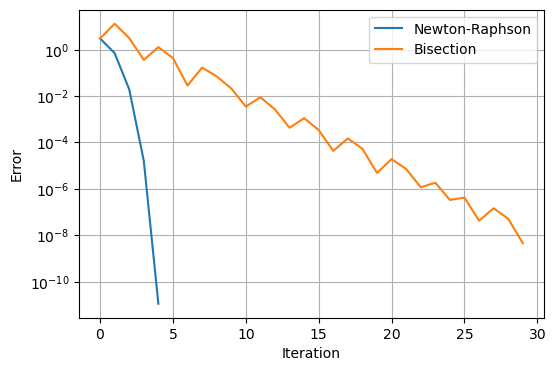

In [226]:
# ANSWER CELL
# BEGIN SOLUTION
f = lambda x: x*x*x - 3*x - 5
df = lambda x: 3*x*x - 3
R_n,E_n = myNewton(f, df, 2, 100, 1e-8)
R_b,E_b = myBisection(f, 0, 4, 100, 1e-8)

# Plot
plt.figure(figsize=(6,4))
plt.semilogy(E_n,label = 'Newton-Raphson')
plt.semilogy(E_b,label = 'Bisection')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.grid()
plt.legend();
# END SOLUTION

## Question 4: Springs

The spring shock system in automobiles is an example of a real mechanical system which exhibits damped oscillation over time (see response in Figure 2). The resistance force of the spring $F$ (N), with respect to time $t$ (s), can be modeled with the following equation

\begin{equation*}
F(t) = k_1  \exp{\left(-\frac{t}{k_2\pi}\right)}\cos{(\pi t)} 
\end{equation*}

where $k_1$ and $k_2$ are known spring constants (N/s).

<img src="resources/spring.png" style="width: 500px;"/>
<figcaption style="text-align:center"> Figure 2. Damping effect with spring constants $k_1 = 1000$ N/s and $k_2 = 0.6$. </figcaption>   

We will use the above equation to describe the force on a car's shock system following a speed bump encountered at $t = 0$ seconds. We want to find a time instance near $t = 2.5$ seconds when the resistance force $F$ is equal to zero. In order to do that, we need to find the root values of $F(t)$.

Write a function named `damping_root(k1,k2,t0,method)` where the inputs are:
* `k1, k2`: the spring constants defined above.
* `t0`: the time instance of interest around which we want to find a root value.
* `method`: a string that 

The function should return the root of $F(t)$ as determined by the specified method. If `method` is specified as `newton`, use your `myNewton` function to solve the problem with the initial estimate `t0` along with `maxiter = 20` and `tol = 1e-8`. If `method` is specified as `fsolve`, use the built-in `scipy.optimize.fsolve` function. Use the initial estimate `t0` along with the default parameters. Refer to the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

If `method` is neither `newton` nor `fsolve`, then return the output should be the error message 'Invalid method.' 

Once you are done, try out your new `damping_root(k1,k2,t0,method)` function for the examples below in the following cell. Assign the output to `q4`. Feel free to try it for other inputs.

```PYTHON
Examples:

>>> k1,k2,t0 = 1000, 0.6, 5.1
>>> damping_root(k1,k2,t0,method='newton')
5.49999999999843  

>>> k1,k2,t0 = 1000, 0.6, 5.1
>>> damping_root(k1,k2,t0,method='fsolve')
5.500000000000001

>>> k1,k2,t0 = 1000, 0.6, 4.9
>>> damping_root(k1,k2,t0,method='newton')
1.499999999999827

>>> k1,k2,t0 = 1000, 0.6, 4.9
>>> damping_root(k1,k2,t0,method='fsolve')
5.500000000000022

>>> k1,k2,t0 = 1000, 0.6, 4.9
>>> damping_root(k1,k2,t0,method='bisection')
'Invalid method.'
```

In [227]:
# ANSWER CELL

# BEGIN SOLUTION
def damping_root(k1,k2,t0,method):
    if method == 'newton':
        f = lambda t: k1*np.exp(-t/np.pi/k2)*np.cos(np.pi*t)
        df = lambda t: k1*np.exp(-t/np.pi/k2)*np.cos(np.pi*t)*(-1/np.pi/k2) - k1*np.exp(-t/np.pi/k2)*np.sin(np.pi*t)*np.pi
        R,E = myNewton(f, df, t0, maxiter=100, tol=1e-8)
        x = R[-1]
    elif method == 'fsolve':
        f = lambda t: k1*np.exp(-t/np.pi/k2)*np.cos(np.pi*t)
        x = scipy.optimize.fsolve(f, t0)[0]
    else:
        x ='Invalid method.'
    return x
# END SOLUTION

In [228]:
# TEST YOUR FUNCTION HERE
k1,k2,t0 = 1000, 0.6, 4.9
q4 = damping_root(k1,k2,t0,method='fsolve') # SOLUTION
q4

5.500000000000022

In [229]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q4)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

## Question 5: Pipeline

Consider the problem of building a pipeline from an offshore oil platform, a distance $H$ miles from the shoreline, to an oil refinery station on land, a distance $L$ miles along the shore. The cost of building the pipe is $C_{ocean}$ per mile while the pipe is under the ocean and $C_{land}$ per mile while the pipe is on land. The pipe will be built in a straight line toward the shore where it will make contact at some point, $x$, between $0$ and $L$. It will continue along the shore on land until it reaches the oil refinery. See Figure 3 for clarification.

<img src="resources/oil_platform.png" style="width: 400px;"/>
<figcaption style="text-align:center"> Figure 3. Pipeline geometry. </figcaption>   

Write a function `my_pipe_builder(C_ocean,C_land,L,H)` where the input arguments are as described above and the output is the x-value that minimizes the total cost of the pipeline. You should use your `myBisection` function to determine this value to within a tolerance of $1\times10^{-6}$ starting at an initial bound of $a=0$ and $b=L$.

Once you are done, try out your new `my_pipe_builder(C_ocean,C_land,L,H)` function for the examples below in the following cell. Assign the output to `q5`. Feel free to try it for other inputs.

Do not use any built-in optimization or root-finding functions.
```PYTHON
Examples:
   
>>> my_pipe_builder(20, 10, 100, 50)
28.867512941360474

>>> my_pipe_builder(30, 10, 100, 50)
17.677670717239380

>>> my_pipe_builder(30, 10, 100, 20)
7.071067392826080
```

*Hint:* Approach this problem by first formulating the total cost function and its derivative on paper. Then set the derivative to zero and find the root of the equation using the bisection method. This solution either minimizes or maximizes the cost. How can we be sure it's the former? How do we know it's unique?

In [230]:
# ANSWER CELL
# BEGIN SOLUTION
def my_pipe_builder(C_ocean,C_land,L,H):
    """
    >>> my_pipe_builder(20, 10, 100, 50)
    28.867512941360474

    >>> my_pipe_builder(30, 10, 100, 50)
    17.677670717239380

    >>> my_pipe_builder(30, 10, 100, 20)
    7.071067392826080
    """
    # Derivative of the cost function
    dcost = lambda x: C_ocean/np.sqrt(H**2+x**2)*x-C_land
    # Bisection method
    R,E = myBisection(dcost, 0, L, 100, 1e-6)
    # Return solution for x
    return R[-1]

# END SOLUTION

In [231]:
# TEST YOUR FUNCTION HERE
q5 = my_pipe_builder(20, 10, 100, 50)
q5

28.867512941360474

In [232]:
# Check students tested the function (type is not ellipsis)
assert get_hash(type(q5)) != '14e736438b115821cbb9b7ac0ba79034', "Make sure to test your function!"

In [233]:
# Check provided examples
assert get_hash(np.round(my_pipe_builder(20, 10, 100, 50),6)) == '91b09c4e521616d4fb9817f47252fda1'
assert get_hash(np.round(my_pipe_builder(30, 10, 100, 50),6)) == '48123c95a6bf3a1e7ed7f415cf5fa340'
assert get_hash(np.round(my_pipe_builder(30, 10, 100, 20),6)) == 'bc5c8ab317a330c74a461a94c12a185b'

In [234]:
# Check new examples
assert get_hash(np.round(my_pipe_builder(10, 0, 10, 10),6)) == '01c7119b2e63d1290944cc9d9e84ddb8'
assert get_hash(np.round(my_pipe_builder(0, 10, 10, 10),6)) == '43a1437f7f656cd8be7c996c58719e0a'
assert get_hash(np.round(my_pipe_builder(20, 15, 100, 50),6)) == '227c1fcd1a98427a7d7e594f17d8373e'
assert get_hash(np.round(my_pipe_builder(20, 15, 100, 10),6)) == '651242fe3db66f792df05b1647a74fd8'